In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [0]:
cd '/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data/mydata'

/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data/mydata


In [0]:
df=pd.read_csv('df1_train.csv')[['review_title','variety',]]

In [0]:
df.head()

,review_title,variety
0,Domaines Bunan 2014 Château la Rouvière Rosé (...,Rosé
1,Wieninger 2014 White (Wiener Gemischter Satz),White Blend
2,Tensley 2015 Colson Canyon Vineyard Syrah (San...,Syrah
3,Bodegas Luzón 2008 Red (Jumilla),Red Blend
4,Big Smooth 2014 Zinfandel (Lodi),Zinfandel


In [0]:
df['category_id']=df['variety'].factorize()[0]

In [0]:
category_id_df=df[['variety','category_id']].drop_duplicates().sort_values('category_id')

In [0]:
category_to_id = category_id_df.set_index('variety')['category_id'].to_dict()

In [0]:
id_to_category = category_id_df.set_index('category_id')['variety'].to_dict()

{'Bordeaux-style Red Blend': 5,
 'Bordeaux-style White Blend': 20,
 'Cabernet Franc': 18,
 'Cabernet Sauvignon': 11,
 'Champagne Blend': 14,
 'Chardonnay': 10,
 'Gamay': 25,
 'Gewürztraminer': 17,
 'Grüner Veltliner': 6,
 'Malbec': 16,
 'Merlot': 22,
 'Nebbiolo': 12,
 'Pinot Grigio': 21,
 'Pinot Gris': 26,
 'Pinot Noir': 7,
 'Portuguese Red': 13,
 'Portuguese White': 24,
 'Red Blend': 3,
 'Rhône-style Red Blend': 27,
 'Riesling': 8,
 'Rosé': 0,
 'Sangiovese': 9,
 'Sauvignon Blanc': 15,
 'Sparkling Blend': 23,
 'Syrah': 2,
 'Tempranillo': 19,
 'White Blend': 1,
 'Zinfandel': 4}

In [0]:
import nltk

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords

In [0]:
stop = list(stopwords.words('english'))

In [0]:
my = category_id_df.variety.to_list()

In [0]:
mylist = [] 
for w in my:
  lis=w.split()
  for l in lis:
    mylist.append(l.lower())

In [0]:
stop.extend(mylist)

In [0]:
stop=set(stop)
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'blanc',
 'blend',
 'bordeaux-style',
 'both',
 'but',
 'by',
 'cabernet',
 'can',
 'champagne',
 'chardonnay',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'franc',
 'from',
 'further',
 'gamay',
 'gewürztraminer',
 'grigio',
 'gris',
 'grüner',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'malbec',
 'me',
 'merlot',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 '

In [0]:
tfidf=TfidfVectorizer( sublinear_tf=True,min_df=10,norm='l2',ngram_range=(1,2),stop_words=stop)

In [0]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'blanc', 'blend', 'bordeaux-style', 'both', 'but',
                            'by', ...},
                strip_accents=None, sublinear_tf=True,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [0]:
features = tfidf.fit_transform(df.review_title)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bordeaux', 'rhône', 'style'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
features.shape

(41319, 5312)

In [0]:
features=features.toarray()

In [0]:
labels=df.category_id

In [0]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for variety, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(variety))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. médoc
. château
  . Most correlated bigrams:
. de bordeaux
. saint émilion
# 'Bordeaux-style White Blend':
  . Most correlated unigrams:
. barsac
. sauternes
  . Most correlated bigrams:
. sample sauternes
. 2016 bordeaux
# 'Cabernet Franc':
  . Most correlated unigrams:
. bourgueil
. chinon
  . Most correlated bigrams:
. saint nicolas
. de bourgueil
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. oakville
. napa
  . Most correlated bigrams:
. alexander valley
. napa valley
# 'Champagne Blend':
  . Most correlated unigrams:
. nv
. brut
  . Most correlated bigrams:
. cru brut
. nv brut
# 'Chardonnay':
  . Most correlated unigrams:
. fuissé
. chablis
  . Most correlated bigrams:
. cru chablis
. pouilly fuissé
# 'Gamay':
  . Most correlated unigrams:
. morgon
. beaujolais
  . Most correlated bigrams:
. georges duboeuf
. beaujolais villages
# 'Gewürztraminer':
  . Most correlated unigrams:
. alsace
. gewurztraminer
  . M

Started Training LinearSVC
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Completed Training LinearSVC
Started Training MultinomialNB
Completed Training MultinomialNB


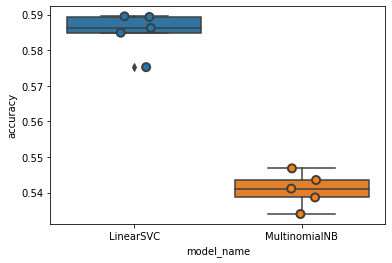

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    LinearSVC(verbose=1),
    MultinomialNB(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  print("Started Training {}".format(model_name))
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
  print("Completed Training {}".format(model_name))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC        0.585082
MultinomialNB    0.540841
Name: accuracy, dtype: float64

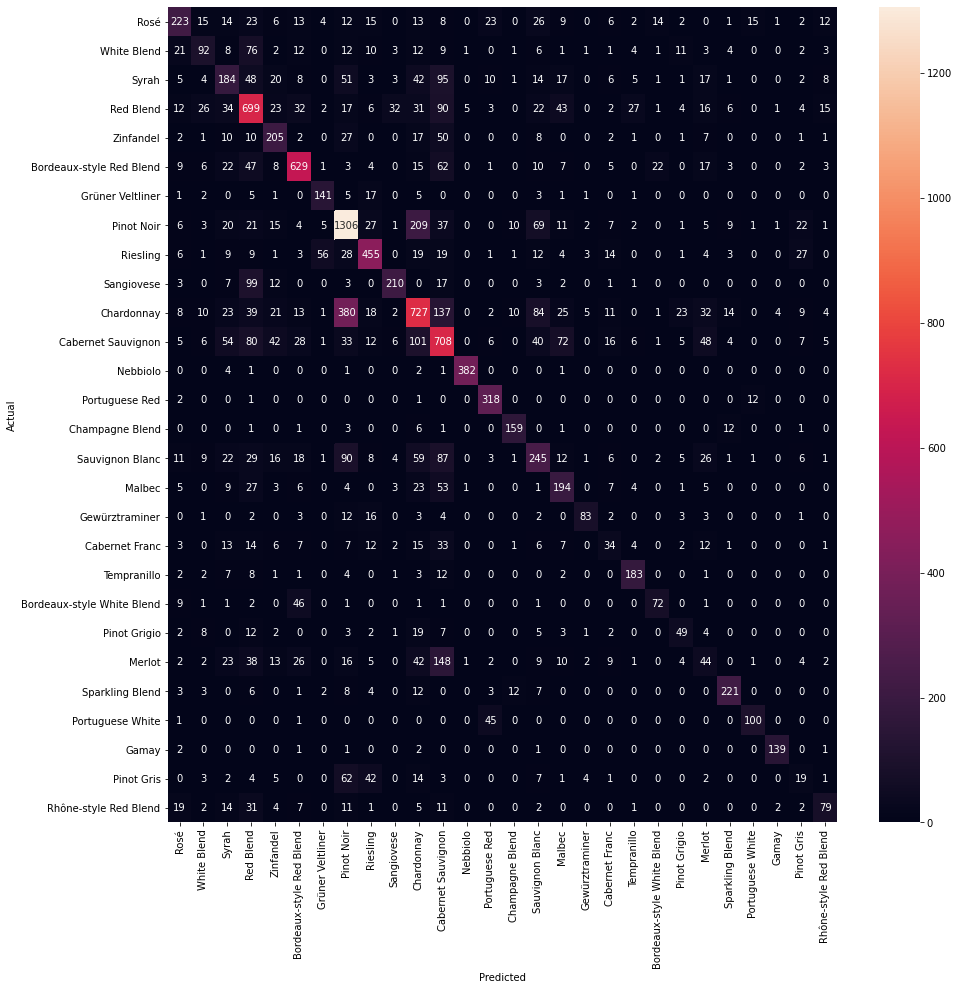

In [0]:
from sklearn.model_selection import train_test_split
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.variety.values, yticklabels=category_id_df.variety.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [0]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 100:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['variety', 'review_title']])
      print('')

'Chardonnay' predicted as 'Pinot Noir' : 380 examples.


,variety,review_title
14086,Chardonnay,Felton Road 2008 Block 2 Chardonnay (Central O...
28466,Chardonnay,Thomas Henry 2010 Chardonnay (Napa County)
6768,Chardonnay,Kynsi 2006 Edna Ranch Vineyard Chardonnay (Edn...
13839,Chardonnay,Vinum 2015 Chardonnay (Monterey)
36136,Chardonnay,Davis Bynum 2007 Chardonnay (Russian River Val...
...,...,...
23698,Chardonnay,Kessler-Haak 2012 Chardonnay (Sta. Rita Hills)
31815,Chardonnay,Fernz 2009 Chardonnay (Marlborough)
9778,Chardonnay,Sea Smoke 2014 Chardonnay (Sta. Rita Hills)
25290,Chardonnay,Lucas & Lewellen 2015 Chardonnay (Santa Barbar...



'Pinot Noir' predicted as 'Chardonnay' : 209 examples.


,variety,review_title
19923,Pinot Noir,Domaine Serene 2013 Jerusalem Hill Vineyard Pi...
12408,Pinot Noir,Faiveley 2005 La Framboisière (Mercurey)
31806,Pinot Noir,Roth 2009 Pinot Noir (Sonoma Coast)
31912,Pinot Noir,El Lugar 2015 Bien Nacido Vineyard Pinot Noir ...
38335,Pinot Noir,Artesa 2006 Reserve Pinot Noir (Carneros)
...,...,...
36936,Pinot Noir,Jeriko 2011 Dijon Clone Pinot Noir (Mendocino)
27185,Pinot Noir,Wild Oats 2013 Pinot Noir (Edna Valley)
1866,Pinot Noir,Vista Hills 2014 Heritage Reserve Pinot Noir (...
24195,Pinot Noir,Uptick Vineyards 2011 Estate Pinot Noir (Russi...



'Cabernet Sauvignon' predicted as 'Chardonnay' : 101 examples.


,variety,review_title
34029,Cabernet Sauvignon,Chime 2014 Cabernet Sauvignon (California)
2124,Cabernet Sauvignon,Barra of Mendocino 2015 Estate Grown Cabernet ...
22672,Cabernet Sauvignon,Gordon Estate 2014 Cabernet Sauvignon (Columbi...
32105,Cabernet Sauvignon,Arrowood 2008 Reserve Speciale Cabernet Sauvig...
6722,Cabernet Sauvignon,Black Stallion 2009 Estate Cabernet Sauvignon ...
...,...,...
19602,Cabernet Sauvignon,Edna Valley Vineyard 2011 Cabernet Sauvignon (...
29396,Cabernet Sauvignon,Ironstone 2012 Cabernet Sauvignon (California)
38346,Cabernet Sauvignon,Chime 2011 Cabernet Sauvignon (California)
24169,Cabernet Sauvignon,Michel Torino 2006 Coleccion Cabernet Sauvigno...



'Chardonnay' predicted as 'Cabernet Sauvignon' : 137 examples.


,variety,review_title
29651,Chardonnay,Undurraga 2010 Sibaris Reserva Especial Chardo...
30750,Chardonnay,Jarvis 2011 Finch Hollow Estate Grown Cave Fer...
32357,Chardonnay,Stuhlmuller Vineyards 2009 Reserve Chardonnay ...
39426,Chardonnay,Casa Rivas 2001 Reserva - Estate Bottled Chard...
3590,Chardonnay,Courtney Benham 2011 Reserve Chardonnay (Napa ...
...,...,...
37487,Chardonnay,Concannon 2015 Reserve Chardonnay (Livermore V...
8598,Chardonnay,Dutcher Crossing 2006 Stuhlmuller Vineyard Cha...
37090,Chardonnay,Beaulieu Vineyard 2006 Chardonnay (Napa Valley)
21149,Chardonnay,Gundlach Bundschu 2007 Estate Vineyard Chardon...



'Merlot' predicted as 'Cabernet Sauvignon' : 148 examples.


,variety,review_title
25459,Merlot,Leaping Lizard 2007 Merlot (Napa Valley)
10191,Merlot,Obelisco Estate 2009 Reserve Merlot (Red Mount...
7835,Merlot,Pedestal 2013 Merlot (Columbia Valley (WA))
23445,Merlot,Viña Casablanca 2012 Nimbus Single Vineyard Me...
34824,Merlot,Echeverria 2013 Gran Reserva Merlot (Curicó Va...
...,...,...
21292,Merlot,Northstar 2010 Merlot (Walla Walla Valley (WA))
11754,Merlot,Columbia Crest 2006 H3 Merlot (Horse Heaven Hi...
6888,Merlot,Post House 2007 Merlot (Stellenbosch)
18974,Merlot,Castillo's Hillside Shire 2014 Merlot (Santa C...


In [0]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bordeaux-style Red Blend':
  . Top unigrams:
       . médoc
       . pauillac
  . Top bigrams:
       . bordeaux supérieur
       . saint estèphe
# 'Bordeaux-style White Blend':
  . Top unigrams:
       . sauternes
       . barsac
  . Top bigrams:
       . bergerac sec
       . 2007 pessac
# 'Cabernet Franc':
  . Top unigrams:
       . chinon
       . bourgueil
  . Top bigrams:
       . reserve carmel
       . shenandoah valley
# 'Cabernet Sauvignon':
  . Top unigrams:
       . bully
       . papa
  . Top bigrams:
       . vineyard los
       . wine cellars
# 'Champagne Blend':
  . Top unigrams:
       . brut
       . deutz
  . Top bigrams:
       . moët chandon
       . louis roederer
# 'Chardonnay':
  . Top unigrams:
       . chablis
       . meursault
  . Top bigrams:
       . saint véran
       . ranch sta
# 'Gamay':
  . Top unigrams:
       . morgon
       . fleurie
  . Top bigrams:
       . moulin vent
       . saint amour
# 'Gewürztraminer':
  . Top unigrams:
       . gewurzt

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['variety'].unique()))

                            precision    recall  f1-score   support

                      Rosé       0.62      0.49      0.54       459
               White Blend       0.47      0.31      0.37       296
                     Syrah       0.38      0.34      0.36       546
                 Red Blend       0.52      0.61      0.56      1153
                 Zinfandel       0.50      0.59      0.55       345
  Bordeaux-style Red Blend       0.73      0.72      0.72       876
          Grüner Veltliner       0.66      0.77      0.71       183
                Pinot Noir       0.62      0.73      0.67      1795
                  Riesling       0.69      0.67      0.68       676
                Sangiovese       0.78      0.59      0.67       358
                Chardonnay       0.52      0.45      0.48      1603
        Cabernet Sauvignon       0.44      0.55      0.49      1286
                  Nebbiolo       0.98      0.97      0.98       392
            Portuguese Red       0.76      0.95

In [0]:
from joblib import dump,load

In [0]:
dump(tfidf,'tfidf_review_title_mod.joblib')

['tfidf_review_title_mod.joblib']

In [0]:
dump(model,'svm_review_title_mod.joblib')

['svm_review_title_mod.joblib']

In [0]:
dump((id_to_category),'label_dictionary.joblib')

['label_dictionary.joblib']

In [0]:
dump((category_to_id),'category_to_id.joblib')

['category_to_id.joblib']

In [0]:
dump(category_id_df,'category_id_df.joblib')

['category_id_df.joblib']